In [1]:
import numpy as np
import matplotlib.pyplot as plt

$$
u(x) = \frac{1-e^{x/\epsilon}}{1-e^{1/\epsilon}}
$$

In [29]:
def exct_sol(x, eps):
    return ((-np.e**(x/eps))+1)/((-np.e**(1/eps))+1)

In [26]:
eps = 1
c = [0,0]
u0 = [0,1]

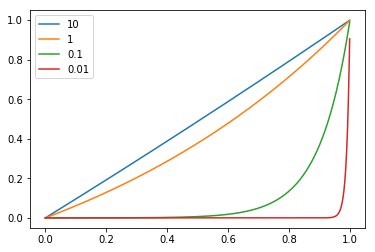

In [28]:
xs = np.arange(0,1,0.001)
eps = [10,1,0.1,0.01]
for e in eps:
    plt.plot(xs, exct_sol(xs, e), label = e)
#plt.plot(xs, exct_sol(xs, eps[0]), label = e)
plt.legend()
plt.show()

In [168]:
eps_array = [10,1,0.1,0.01]

eps = eps_array[2]

def bvp_solve(eps, n):
    h = 1/(n+1)
    u0 = ui = 0
    u1 = 1

    A = -2*eps+h
    B = 4*eps
    C = -2*e-h
    
    M_A = A*np.eye(n,k = 1)
    M_B = B*np.eye(n)
    M_C = C*np.eye(n, k = -1)
    
    M = M_A + M_B + M_C
   # M = np.array([
   #     [B, A, 0, 0],
   #     [C, B, A, 0],
   #     [0, C, B, A],
   #     [0, 0, C, B]
   # ])

    b = np.zeros(n)
    b[0] = -C*u0
    b[-1] = -A*u1
    #b = np.array([-C*u0, 0, 0, -A*u1])
    u = np.linalg.solve(M,b)
    hs = [0]
    while hs[-1] <= 1:
        hs.append(hs[-1] + h)
    u = np.insert(u,0,0)
    u = np.append(u,1)
    return u, hs

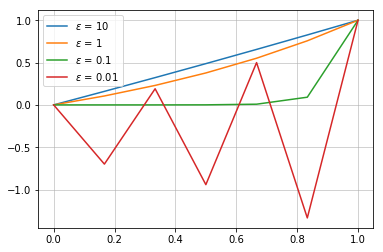

In [169]:
for e in eps_array:
    u, hs = bvp_solve(e, 5)
    plt.plot(hs[:-1], u, label = '$\epsilon$ = ' + str(e))
plt.legend()
plt.grid(alpha = 0.7)
plt.show()

In [170]:
eps_array = [10,1,0.1,0.01]

eps = eps_array[2]

def bvp_solve2(eps, n):
    #n = 5
    h = 1/(n+1)
    u0 = ui = 0
    u1 = 1

    A = -eps
    B = 2*eps+h
    C = -eps-h
    
    M_A = A*np.eye(n,k = 1)
    M_B = B*np.eye(n)
    M_C = C*np.eye(n, k = -1)
    
    M = M_A + M_B + M_C
   # M = np.array([
   #     [B, A, 0, 0],
   #     [C, B, A, 0],
   #     [0, C, B, A],
   #     [0, 0, C, B]
   # ])

    b = np.zeros(n)
    b[0] = -C*u0
    b[-1] = -A*u1
    #b = np.array([-C*u0, 0, 0, -A*u1])
    u = np.linalg.solve(M,b)
    hs = [0]
    while hs[-1] <= 1:
        hs.append(hs[-1] + h)
    u = np.insert(u,0,0)
    u = np.append(u,1)
    return u, hs

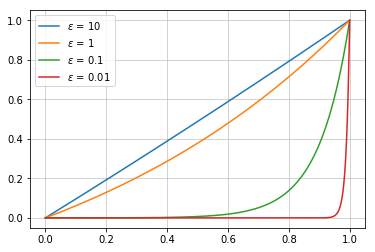

In [171]:
for e in eps_array:
    u, hs = bvp_solve2(e, 500)
    plt.plot(hs, u, label = '$\epsilon$ = ' + str(e))
plt.legend()
plt.grid(alpha = 0.7)
plt.show()